# First Exercise

Pandas seems mandatory to deal with such huge datasets. Therefore we are going to use it. 

In [11]:
%matplotlib inline

import sys
import pandas as pd
from pandas import read_csv
from GeoBases import GeoBase
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.style.use('ggplot')

bookings_location = r'/Volumes/RemiSDCard/Amadeus/bookings.csv'

searches_location = r'/Volumes/RemiSDCard/Amadeus/searches.csv'

def csv_line_counter(filename):
    with open(filename) as f:
        for i,l in enumerate(f):
            pass
        f.close()
    return i + 1

row_count_bookings = csv_line_counter(bookings_location)
row_count_searches = csv_line_counter(searches_location)

print "bookings.csv has %s rows, header included" % row_count_bookings
print "searches.csv has %s rows, header included" % row_count_searches

bookings.csv has 10000011 rows, header included
searches.csv has 20390199 rows, header included


Noticed that the function is considering the header as a row. 

# Second Exercise

The goal of this exercise if to find the top 10 arrival airports in the world in 2013, using the bookings file. Since we only need the columns arr_port and pax, thus we are going to use pandas useful capaibilities to only import the two interesting columns and save space and time. We will then perform an SQL-like inner join to get the litteral names of the airports iata code.

We will use GeoBases https://github.com/opentraveldata/geobases to get the litteral names of the airports concerned.

In [5]:
bookings_df = read_csv(bookings_location,  error_bad_lines = False, sep = '^', usecols = ['arr_port','pax'])

top10_df = bookings_df.groupby(['arr_port']).sum().sort_values(['pax'], ascending = False).head(10)
top10_df.columns = ['number_of_passengers']

geo_o = GeoBase(data='ori_por', verbose=False)

top10_df['airport_litteral_name'] = top10_df.index.map(lambda iata: geo_o.get(iata.strip(),'name'))
top10_df

,number_of_passengers,airport_litteral_name
arr_port,,
LHR,88809,London Heathrow Airport
MCO,70930,Orlando International Airport
LAX,70530,Los Angeles International Airport
LAS,69630,Mc Carran International Airport
JFK,66270,John F Kennedy International Airport
CDG,64490,Paris - Charles-de-Gaulle
BKK,59460,Suvarnabhumi
MIA,58150,Miami International Airport
SFO,58000,San Francisco International Airport


# Third Exercise

The aim of this exercise is to plot the monthly number of searches for flights arriving at Málaga, Madrid and Barcelona.

We will thus use pandas visualization tool http://pandas.pydata.org/pandas-docs/stable/visualization.html
Since the Destination column contains only iata codes, we have to use geobases again to find the iata code for Malaga, Madrid and Barcelona.

In [18]:
searches_df = read_csv(searches_location,  error_bad_lines = False, sep = '^', usecols = ['Date','Destination'])

geo_a = GeoBase(data='airports', verbose=False)

# Geobases function that gets us iata_code for each airport
malaga = geo_a.fuzzyFind('malaga', 'name')[0]
madrid = geo_a.fuzzyFind('madrid', 'name')[0]
barcelone = geo_a.fuzzyFind('barcelona', 'name')[0]

airports = pd.DataFrame([malaga[1],madrid[1],barcelone[1]])
airports.columns = ['Destination']
airports


,Destination
0,AGP
1,MAD
2,BCN


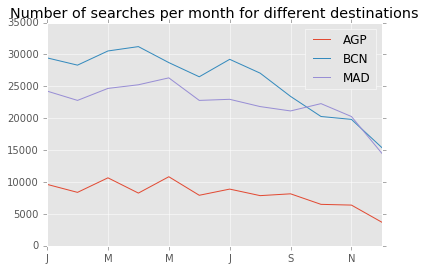

In [20]:
airports_concerned = pd.merge(searches_df, airports, how='inner' , on='Destination')
airports_concerned['month'] = airports_concerned['Date'].map(lambda date: pd.datetime.strptime(date, '%Y-%m-%d').month)

for airport, rest in airports_concerned.groupby('Destination'):
    graph = rest.groupby('month').size()
    graph.index = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
    graph.plot(kind='line', x='month', legend='Number of searches', label=airport, 
               title='Number of searches per month for different destinations')

Before plotting this graph, I thought that these curves were forming a cycle. Meaning that at the end of December , the curves should be approximatively at the same values that at the beginning of January. In this graph this is not the case, we observe a general decreasing tendency. We can maybe attribute that tendency to the general climat of crisis at the time in Europe. In 2013, in Spain, there was also a pic in the unemployment rate of the country.

Source for the unemployment rate : http://www.tradingeconomics.com/spain/unemployment-rate

# Bonus Exercise One

For every search in the searches file, we have to find out whether the search ended up in a booking or not.